# Inspect time series based on Dat

In [1]:
#Import required libraries
import os
import numpy as np
import pandas as pd
import data_reader.data_processing as proc
import matplotlib.pyplot as plt
import analyses.transient as sta
import h5py

In [2]:
sourcedatadir = "E:/Saturated_flow/EGUGoldschmidtdataset6"
hdf5directory = "Y:/Home/khurana/4. Publications/Restructuring"
Regimes = ["Slow", "Equal", "Fast"]

In [3]:
gvarnames = ["DO", "DOC", "TOC", "Nitrate", "Ammonium", "Nitrogen"]
imposedtimeseries = ["1","2","5"]
Trial = proc.masterscenarios().keys()

## Generate a time series file (HDF5 format) to store all the data

### Data is essentially concentration of reactive species leaving the domain normalized by that in the uniform flow scenario

In [22]:
h5file = h5py.File(os.path.join(hdf5directory, "Paper2", "Figurecodes","Temporal_analysis_full_data.h5"), mode = 'w')
for Reg in Regimes:
    basedata = np.load(os.path.join(sourcedatadir, Reg + "AR_0/NS-AH/NS-AH_df.npy"))
    basevelocity = np.mean(basedata[2, -1, :, :])
    for t in imposedtimeseries:
        directory = os.path.join(sourcedatadir,Reg + "AR_" + t)
        print (Reg, t)
        for j in Trial:
                if ((j == '52' and t == "5") or (j == '43' and t == "1")):
                    pass
                else:
                    basefile = os.path.join(Reg + "AR_0","NS-A"+j,"NS-A"+j+"_df.npy")
                    basedata = np.load(os.path.join(sourcedatadir, basefile))
                    baseconcs, flow, heads = sta.conc_time (basedata,0,-1,0,-1, 51, gvarnames, "Saturated")
                    data = np.load(os.path.join(directory, "NS-A"+j,"NS-A"+j+"_df.npy"))
                    concs, flow, heads = sta.conc_time (data,0,-1,0,-1, 51, gvarnames, "Saturated")
                    subconcs = concs[1:, -1, :]/baseconcs[-1, -1,:]
                    for g in gvarnames:
                        dataset_name = t + "/" + Reg + "/" + j + "/" + g
                        print(dataset_name)
                        h5file.create_dataset(dataset_name, data=subconcs[:, gvarnames.index(g)])
h5file.close()

Slow 1
1/Slow/H/DO
1/Slow/H/DOC
1/Slow/H/TOC
1/Slow/H/Nitrate
1/Slow/H/Ammonium
1/Slow/H/Nitrogen
1/Slow/37/DO
1/Slow/37/DOC
1/Slow/37/TOC
1/Slow/37/Nitrate
1/Slow/37/Ammonium
1/Slow/37/Nitrogen
1/Slow/38/DO
1/Slow/38/DOC
1/Slow/38/TOC
1/Slow/38/Nitrate
1/Slow/38/Ammonium
1/Slow/38/Nitrogen
1/Slow/39/DO
1/Slow/39/DOC
1/Slow/39/TOC
1/Slow/39/Nitrate
1/Slow/39/Ammonium
1/Slow/39/Nitrogen
1/Slow/40/DO
1/Slow/40/DOC
1/Slow/40/TOC
1/Slow/40/Nitrate
1/Slow/40/Ammonium
1/Slow/40/Nitrogen
1/Slow/41/DO
1/Slow/41/DOC
1/Slow/41/TOC
1/Slow/41/Nitrate
1/Slow/41/Ammonium
1/Slow/41/Nitrogen
1/Slow/42/DO
1/Slow/42/DOC
1/Slow/42/TOC
1/Slow/42/Nitrate
1/Slow/42/Ammonium
1/Slow/42/Nitrogen
1/Slow/44/DO
1/Slow/44/DOC
1/Slow/44/TOC
1/Slow/44/Nitrate
1/Slow/44/Ammonium
1/Slow/44/Nitrogen
1/Slow/45/DO
1/Slow/45/DOC
1/Slow/45/TOC
1/Slow/45/Nitrate
1/Slow/45/Ammonium
1/Slow/45/Nitrogen
1/Slow/46/DO
1/Slow/46/DOC
1/Slow/46/TOC
1/Slow/46/Nitrate
1/Slow/46/Ammonium
1/Slow/46/Nitrogen
1/Slow/47/DO
1/Slow/47/DOC
1/

2/Slow/73/DO
2/Slow/73/DOC
2/Slow/73/TOC
2/Slow/73/Nitrate
2/Slow/73/Ammonium
2/Slow/73/Nitrogen
2/Slow/74/DO
2/Slow/74/DOC
2/Slow/74/TOC
2/Slow/74/Nitrate
2/Slow/74/Ammonium
2/Slow/74/Nitrogen
2/Slow/75/DO
2/Slow/75/DOC
2/Slow/75/TOC
2/Slow/75/Nitrate
2/Slow/75/Ammonium
2/Slow/75/Nitrogen
2/Slow/76/DO
2/Slow/76/DOC
2/Slow/76/TOC
2/Slow/76/Nitrate
2/Slow/76/Ammonium
2/Slow/76/Nitrogen
2/Slow/77/DO
2/Slow/77/DOC
2/Slow/77/TOC
2/Slow/77/Nitrate
2/Slow/77/Ammonium
2/Slow/77/Nitrogen
2/Slow/78/DO
2/Slow/78/DOC
2/Slow/78/TOC
2/Slow/78/Nitrate
2/Slow/78/Ammonium
2/Slow/78/Nitrogen
2/Slow/79/DO
2/Slow/79/DOC
2/Slow/79/TOC
2/Slow/79/Nitrate
2/Slow/79/Ammonium
2/Slow/79/Nitrogen
2/Slow/80/DO
2/Slow/80/DOC
2/Slow/80/TOC
2/Slow/80/Nitrate
2/Slow/80/Ammonium
2/Slow/80/Nitrogen
2/Slow/81/DO
2/Slow/81/DOC
2/Slow/81/TOC
2/Slow/81/Nitrate
2/Slow/81/Ammonium
2/Slow/81/Nitrogen
2/Slow/82/DO
2/Slow/82/DOC
2/Slow/82/TOC
2/Slow/82/Nitrate
2/Slow/82/Ammonium
2/Slow/82/Nitrogen
2/Slow/83/DO
2/Slow/83/DOC
2/S

1/Equal/61/DO
1/Equal/61/DOC
1/Equal/61/TOC
1/Equal/61/Nitrate
1/Equal/61/Ammonium
1/Equal/61/Nitrogen
1/Equal/62/DO
1/Equal/62/DOC
1/Equal/62/TOC
1/Equal/62/Nitrate
1/Equal/62/Ammonium
1/Equal/62/Nitrogen
1/Equal/63/DO
1/Equal/63/DOC
1/Equal/63/TOC
1/Equal/63/Nitrate
1/Equal/63/Ammonium
1/Equal/63/Nitrogen
1/Equal/64/DO
1/Equal/64/DOC
1/Equal/64/TOC
1/Equal/64/Nitrate
1/Equal/64/Ammonium
1/Equal/64/Nitrogen
1/Equal/65/DO
1/Equal/65/DOC
1/Equal/65/TOC
1/Equal/65/Nitrate
1/Equal/65/Ammonium
1/Equal/65/Nitrogen
1/Equal/66/DO
1/Equal/66/DOC
1/Equal/66/TOC
1/Equal/66/Nitrate
1/Equal/66/Ammonium
1/Equal/66/Nitrogen
1/Equal/67/DO
1/Equal/67/DOC
1/Equal/67/TOC
1/Equal/67/Nitrate
1/Equal/67/Ammonium
1/Equal/67/Nitrogen
1/Equal/68/DO
1/Equal/68/DOC
1/Equal/68/TOC
1/Equal/68/Nitrate
1/Equal/68/Ammonium
1/Equal/68/Nitrogen
1/Equal/69/DO
1/Equal/69/DOC
1/Equal/69/TOC
1/Equal/69/Nitrate
1/Equal/69/Ammonium
1/Equal/69/Nitrogen
1/Equal/70/DO
1/Equal/70/DOC
1/Equal/70/TOC
1/Equal/70/Nitrate
1/Equal/70

5/Equal/43/DO
5/Equal/43/DOC
5/Equal/43/TOC
5/Equal/43/Nitrate
5/Equal/43/Ammonium
5/Equal/43/Nitrogen
5/Equal/44/DO
5/Equal/44/DOC
5/Equal/44/TOC
5/Equal/44/Nitrate
5/Equal/44/Ammonium
5/Equal/44/Nitrogen
5/Equal/45/DO
5/Equal/45/DOC
5/Equal/45/TOC
5/Equal/45/Nitrate
5/Equal/45/Ammonium
5/Equal/45/Nitrogen
5/Equal/46/DO
5/Equal/46/DOC
5/Equal/46/TOC
5/Equal/46/Nitrate
5/Equal/46/Ammonium
5/Equal/46/Nitrogen
5/Equal/47/DO
5/Equal/47/DOC
5/Equal/47/TOC
5/Equal/47/Nitrate
5/Equal/47/Ammonium
5/Equal/47/Nitrogen
5/Equal/48/DO
5/Equal/48/DOC
5/Equal/48/TOC
5/Equal/48/Nitrate
5/Equal/48/Ammonium
5/Equal/48/Nitrogen
5/Equal/49/DO
5/Equal/49/DOC
5/Equal/49/TOC
5/Equal/49/Nitrate
5/Equal/49/Ammonium
5/Equal/49/Nitrogen
5/Equal/50/DO
5/Equal/50/DOC
5/Equal/50/TOC
5/Equal/50/Nitrate
5/Equal/50/Ammonium
5/Equal/50/Nitrogen
5/Equal/51/DO
5/Equal/51/DOC
5/Equal/51/TOC
5/Equal/51/Nitrate
5/Equal/51/Ammonium
5/Equal/51/Nitrogen
5/Equal/53/DO
5/Equal/53/DOC
5/Equal/53/TOC
5/Equal/53/Nitrate
5/Equal/53

1/Fast/78/DO
1/Fast/78/DOC
1/Fast/78/TOC
1/Fast/78/Nitrate
1/Fast/78/Ammonium
1/Fast/78/Nitrogen
1/Fast/79/DO
1/Fast/79/DOC
1/Fast/79/TOC
1/Fast/79/Nitrate
1/Fast/79/Ammonium
1/Fast/79/Nitrogen
1/Fast/80/DO
1/Fast/80/DOC
1/Fast/80/TOC
1/Fast/80/Nitrate
1/Fast/80/Ammonium
1/Fast/80/Nitrogen
1/Fast/81/DO
1/Fast/81/DOC
1/Fast/81/TOC
1/Fast/81/Nitrate
1/Fast/81/Ammonium
1/Fast/81/Nitrogen
1/Fast/82/DO
1/Fast/82/DOC
1/Fast/82/TOC
1/Fast/82/Nitrate
1/Fast/82/Ammonium
1/Fast/82/Nitrogen
1/Fast/83/DO
1/Fast/83/DOC
1/Fast/83/TOC
1/Fast/83/Nitrate
1/Fast/83/Ammonium
1/Fast/83/Nitrogen
1/Fast/84/DO
1/Fast/84/DOC
1/Fast/84/TOC
1/Fast/84/Nitrate
1/Fast/84/Ammonium
1/Fast/84/Nitrogen
Fast 2
2/Fast/H/DO
2/Fast/H/DOC
2/Fast/H/TOC
2/Fast/H/Nitrate
2/Fast/H/Ammonium
2/Fast/H/Nitrogen
2/Fast/37/DO
2/Fast/37/DOC
2/Fast/37/TOC
2/Fast/37/Nitrate
2/Fast/37/Ammonium
2/Fast/37/Nitrogen
2/Fast/38/DO
2/Fast/38/DOC
2/Fast/38/TOC
2/Fast/38/Nitrate
2/Fast/38/Ammonium
2/Fast/38/Nitrogen
2/Fast/39/DO
2/Fast/39/DOC
2/

5/Fast/66/DO
5/Fast/66/DOC
5/Fast/66/TOC
5/Fast/66/Nitrate
5/Fast/66/Ammonium
5/Fast/66/Nitrogen
5/Fast/67/DO
5/Fast/67/DOC
5/Fast/67/TOC
5/Fast/67/Nitrate
5/Fast/67/Ammonium
5/Fast/67/Nitrogen
5/Fast/68/DO
5/Fast/68/DOC
5/Fast/68/TOC
5/Fast/68/Nitrate
5/Fast/68/Ammonium
5/Fast/68/Nitrogen
5/Fast/69/DO
5/Fast/69/DOC
5/Fast/69/TOC
5/Fast/69/Nitrate
5/Fast/69/Ammonium
5/Fast/69/Nitrogen
5/Fast/70/DO
5/Fast/70/DOC
5/Fast/70/TOC
5/Fast/70/Nitrate
5/Fast/70/Ammonium
5/Fast/70/Nitrogen
5/Fast/71/DO
5/Fast/71/DOC
5/Fast/71/TOC
5/Fast/71/Nitrate
5/Fast/71/Ammonium
5/Fast/71/Nitrogen
5/Fast/72/DO
5/Fast/72/DOC
5/Fast/72/TOC
5/Fast/72/Nitrate
5/Fast/72/Ammonium
5/Fast/72/Nitrogen
5/Fast/73/DO
5/Fast/73/DOC
5/Fast/73/TOC
5/Fast/73/Nitrate
5/Fast/73/Ammonium
5/Fast/73/Nitrogen
5/Fast/74/DO
5/Fast/74/DOC
5/Fast/74/TOC
5/Fast/74/Nitrate
5/Fast/74/Ammonium
5/Fast/74/Nitrogen
5/Fast/75/DO
5/Fast/75/DOC
5/Fast/75/TOC
5/Fast/75/Nitrate
5/Fast/75/Ammonium
5/Fast/75/Nitrogen
5/Fast/76/DO
5/Fast/76/DOC
5/F

## Plot time series of select chemical species to see how they vary in time

(1095,)


<ipython-input-53-9e58145f8d8e>:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n.append(hr.get(t + "/"+ r+ "/" + j + "/"+g).value)


AttributeError: 'NoneType' object has no attribute 'value'

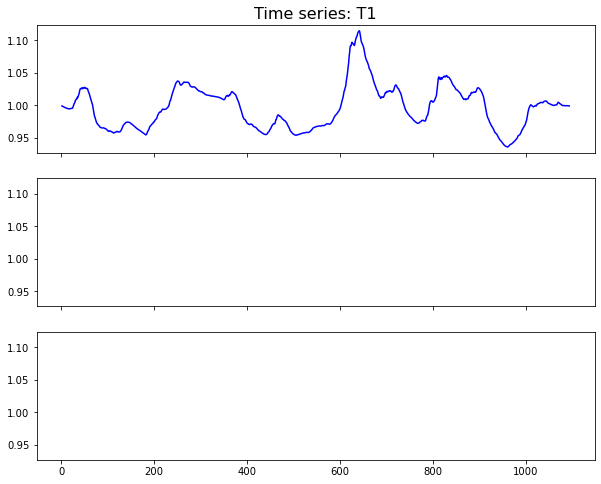

In [53]:
#Characteristic to plot:
imposedtimeseries = ["1","2","5"]
g = "TOC"
#Load dataset for time series in terms of Dat
hr = h5py.File(os.path.join(hdf5directory, "Paper2","Figurecodes","Temporal_analysis_full_data.h5"), mode = 'r')
#Load dataset for base velocity ratio values which will be plotted in the graph
basedata = np.load(os.path.join(sourcedatadir, "SlowAR_0/NS-AH/NS-AH_df.npy"))
basevelocity = np.mean(basedata[2, -1, :, :])
fig, ax = plt.subplots(3, 1, figsize = (10,8), sharey = True, sharex = True)
for t in imposedtimeseries:
    a = ax.flat[imposedtimeseries.index(t)]
    a.set_title("Time series: T"+ t, fontsize = 16)
    for r in Regimes:
        n = []
        for j in Trial:
            if ((j == '52' and t == "5") or (j == '43' and t == "1")):
                pass
            else:
                n.append(hr.get(t + "/"+ r+ "/" + j + "/"+g).value)
        df = pd.DataFrame.from_records(n)
        #Then take average at each time point
        n = df.median()
        print(np.shape(n))
        a.plot(n[1:], label = r, color = PeDapalette[Regimes.index(r)])
        #a.plot(np.convolve(n[1:], np.ones((3,))/3,mode = 'valid'), label = Dat)
    directory = os.path.join(sourcedatadir, "SlowAR_" + t)
    for j in ["37"]:
        a = ax.flat[imposedtimeseries.index(t)]
        data = np.load(os.path.join(directory,"NS-A"+j,"NS-A"+j+"_df.npy"))
        velocity = np.mean(data[2, :, :, :], axis = (-1,-2))/basevelocity
        a.plot(np.abs(velocity[1:]), color= "gray")
a.legend(ncol = 2)
#locs, labels1 = a.xticks()
plt.xticks((0,365,730,1095), (0,5,10,15))
a.set_xlabel ("Time (years)", fontsize = 18)
for a, typsp in zip(ax, imposedtimeseries):
    a.set_title("Time series: "+typsp, fontsize=15)
plt.annotate("Ratio with respect to steady state conditions",
        xy=(0, 1.8),
        xytext=(-50, -10),
        xycoords="axes fraction",
        textcoords="offset points",
        size="large",
        ha="left",
        va="center",
        rotation="vertical",
        fontsize=18)
picname = os.path.join(hdf5directory, "Paper2","Figurecodes","Temporal_analysis_full_data.png")
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
hr.close()

### Identify the time series and categorize in Dat categories from Paper 1 effort

In [70]:
#Generate Dat from Da and Pe
data  = pd.read_csv(os.path.join(hdf5directory,"Paper1","Figurecodes", "Da_29012021_95pcloss.csv"), sep=",")
data["logDa"] = np.log10(data.Da63)

In [73]:
#Consider time series in terms of Dat.
#Sort all the values in Dat
gvarnames = ["DOC", "DO", "TOC", "Nitrogen","Nitrate", "Ammonium"]
#gvarnames = ["DO", "TOC", "Nitrogen"]
finaldata = data[data['Chem'].isin (gvarnames)]
mymarklist = ["^", "o", "s", "d"]
reglist = ["Slow", "Medium", "Fast"]
colorlist = ["indianred", "g", "steelblue"]

finaldata.loc[finaldata["logDa"] > 0.5, "PeDamark"] = 3
finaldata.loc[(finaldata["logDa"] > 0) & (finaldata["logDa"] < 0.5), "PeDamark"] = 2
finaldata.loc[(finaldata["logDa"] > -1) & (finaldata["logDa"] < 0), "PeDamark"] = 1
finaldata.loc[finaldata["logDa"] < -1, "PeDamark"] = 0

labels = {0 : 'log$_{10}$Da < -1',
          1 : '-1 < log$_{10}$Da < 0',
          2 : '0 <log$_{10}$Da < 0.5',
          3 : 'log$_{10}$Da > 0.5'}

subfinal = finaldata[["Trial", "Regime", "Chem", "Time_series","PeDamark"]]
subfinal['key'] = subfinal.Trial + subfinal.Regime + subfinal.Chem + subfinal.Time_series.astype(str)
colorcriteria = subfinal[["PeDamark", "key"]].to_dict('records')
colorcriteria = dict(zip(subfinal['key'], subfinal['PeDamark']))

PeDapalette = {0: "blue", 1: "orange", 2: "g", 3: "indianred"}

<ipython-input-73-8f5847759174>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subfinal['key'] = subfinal.Trial + subfinal.Regime + subfinal.Chem + subfinal.Time_series.astype(str)


In [74]:
colorcriteria

{'HSlowDOC0': 1.0,
 'HSlowDO0': 3.0,
 'HSlowAmmonium0': 1.0,
 'HSlowNitrate0': 2.0,
 'HSlowNitrogen0': 1.0,
 'HSlowTOC0': 1.0,
 '37SlowDOC0': 1.0,
 '37SlowDO0': 3.0,
 '37SlowAmmonium0': 1.0,
 '37SlowNitrate0': 2.0,
 '37SlowNitrogen0': 1.0,
 '37SlowTOC0': 1.0,
 '38SlowDOC0': 1.0,
 '38SlowDO0': 3.0,
 '38SlowAmmonium0': 1.0,
 '38SlowNitrate0': 2.0,
 '38SlowNitrogen0': 1.0,
 '38SlowTOC0': 1.0,
 '39SlowDOC0': 1.0,
 '39SlowDO0': 3.0,
 '39SlowAmmonium0': 1.0,
 '39SlowNitrate0': 2.0,
 '39SlowNitrogen0': 1.0,
 '39SlowTOC0': 1.0,
 '40SlowDOC0': 1.0,
 '40SlowDO0': 3.0,
 '40SlowAmmonium0': 1.0,
 '40SlowNitrate0': 2.0,
 '40SlowNitrogen0': 1.0,
 '40SlowTOC0': 1.0,
 '41SlowDOC0': 1.0,
 '41SlowDO0': 3.0,
 '41SlowAmmonium0': 1.0,
 '41SlowNitrate0': 2.0,
 '41SlowNitrogen0': 1.0,
 '41SlowTOC0': 1.0,
 '42SlowDOC0': 1.0,
 '42SlowDO0': 3.0,
 '42SlowAmmonium0': 1.0,
 '42SlowNitrate0': 2.0,
 '42SlowNitrogen0': 1.0,
 '42SlowTOC0': 1.0,
 '43SlowDOC0': 1.0,
 '43SlowDO0': 3.0,
 '43SlowAmmonium0': 1.0,
 '43SlowNit

In [82]:
Regimes = ["Slow", "Equal", "Fast"]
gvarnames = ["DOC", "DO", "Nitrate", "Ammonium", "TOC", "Nitrate"]
#Load already generated time series
hr = h5py.File(os.path.join(hdf5directory, "Paper2","Figurecodes","Temporal_analysis_full_data.h5"), mode = 'r')
#Write new time series in a new HDF5 file
hw = h5py.File(os.path.join(hdf5directory,"Paper2","Figurecodes","Temporal_analysis_full_Dat.h5"), mode = 'w')
print(hr.keys())

for t in imposedtimeseries:
    n0=[]
    n1=[]
    n2=[]
    n3=[]
    for Reg in Regimes:
        if Reg == "Equal":
            r = "Medium"
        else:
            r = Reg    
        for g in gvarnames:
            for j in Trial:
                if ((j == '52' and t == "5") or (j == '43' and t == "1")):
                    pass
                else:      
                    #print(t, r, g, j)
                    n = hr.get(t + "/" + Reg + "/" + j + "/" + g).value
                    if int(colorcriteria[j+r+g+"0"]) == 0:
                        n0.append(n)
                    elif int(colorcriteria[j+r+g+"0"]) == 1: 
                        n1.append(n)
                    elif int(colorcriteria[j+r+g+"0"]) == 2:
                        n2.append(n)
                    elif int(colorcriteria[j+r+g+"0"]) == 3:
                        n3.append(n)
    for Dat, k in zip([0,1,2,3],[n0, n1, n2, n3]):
        df = pd.DataFrame.from_records(k)
        #Then take average at each time point
        hw.create_dataset(t + "/Dat" + str(Dat) + "/mean/", data=df.mean())
        #Then take average at each time point
        hw.create_dataset(t + "/Dat" + str(Dat) + "/median/", data=df.median())
        #Then take minimum at each time point
        hw.create_dataset(t + "/Dat" + str(Dat) + "/min/", data=df.min())
        #Then take maximum at each time point
        hw.create_dataset(t + "/Dat" + str(Dat) + "/max/", data=df.max())
hr.close()
hw.close()

<KeysViewHDF5 ['1', '2', '5']>


<ipython-input-82-97b7618a15bd>:25: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/" + Reg + "/" + j + "/" + g).value


<ipython-input-83-9fb9b2b32ee7>:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-83-9fb9b2b32ee7>:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-83-9fb9b2b32ee7>:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-83-9fb9b2b32ee7>:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-83-9fb9b2b32ee7>:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-83-9fb9b2b32ee7>:16: H5pyDeprecationWarning: dataset.value has be

(1095,)
(1095,)
(1095,)
(1095,)
(1095,)
(1095,)
(1095,)
(1095,)


<ipython-input-83-9fb9b2b32ee7>:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-83-9fb9b2b32ee7>:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-83-9fb9b2b32ee7>:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-83-9fb9b2b32ee7>:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-83-9fb9b2b32ee7>:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-83-9fb9b2b32ee7>:16: H5pyDeprecationWarning: dataset.value has be

(1095,)
(1095,)
(1095,)
(1095,)
(1095,)
(1095,)
(1095,)
(1095,)


<ipython-input-83-9fb9b2b32ee7>:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-83-9fb9b2b32ee7>:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-83-9fb9b2b32ee7>:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-83-9fb9b2b32ee7>:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-83-9fb9b2b32ee7>:16: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-83-9fb9b2b32ee7>:16: H5pyDeprecationWarning: dataset.value has be

(1095,)
(1095,)
(1095,)
(1095,)
(1095,)
(1095,)
(1095,)
(1095,)


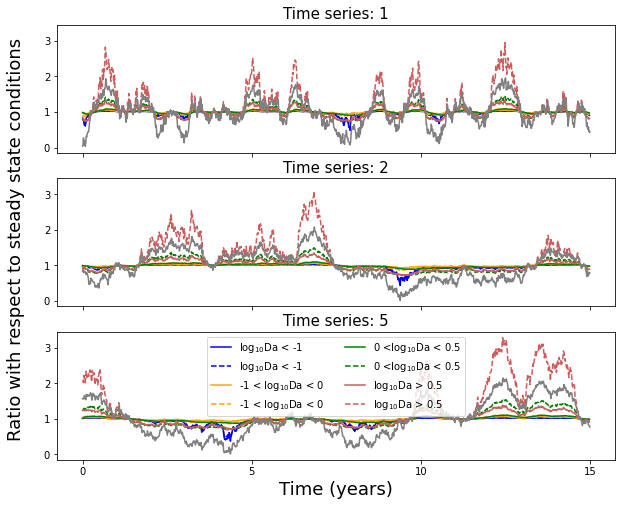

In [83]:
#Characteristic to plot:
datafeatures = ["median", "mean"]
featurelinestyle = ["solid", "dashed"]
imposedtimeseries = ["1","2","5"]
#Load dataset for time series in terms of Dat
hr = h5py.File(os.path.join(hdf5directory, "Paper2","Figurecodes","Temporal_analysis_full_Dat.h5"), mode = 'r')
#Load dataset for base velocity ratio values which will be plotted in the graph
basedata = np.load(os.path.join(sourcedatadir, "SlowAR_0/NS-AH/NS-AH_df.npy"))
basevelocity = np.mean(basedata[2, -1, :, :])
fig, ax = plt.subplots(3, 1, figsize = (10,8), sharey = True, sharex = True)
for t in imposedtimeseries:
    a = ax.flat[imposedtimeseries.index(t)]
    a.set_title("Time series: T"+ t, fontsize = 16)
    for Dat in [0,1,2,3]:
        for datafeature in datafeatures:
            n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
            print(np.shape(n))
            a.plot(n[1:], label = labels[Dat], color = PeDapalette[Dat], linestyle = featurelinestyle[datafeatures.index(datafeature)])
        #a.plot(np.convolve(n[1:], np.ones((3,))/3,mode = 'valid'), label = Dat)
    directory = os.path.join(sourcedatadir, "SlowAR_" + t)
    for j in ["37"]:
        a = ax.flat[imposedtimeseries.index(t)]
        data = np.load(os.path.join(directory,"NS-A"+j,"NS-A"+j+"_df.npy"))
        velocity = np.mean(data[2, :, :, :], axis = (-1,-2))/basevelocity
        a.plot(np.abs(velocity[1:]), color= "gray")
a.legend(ncol = 2)
#locs, labels1 = a.xticks()
plt.xticks((0,365,730,1095), (0,5,10,15))
a.set_xlabel ("Time (years)", fontsize = 18)
for a, typsp in zip(ax, imposedtimeseries):
    a.set_title("Time series: "+typsp, fontsize=15)
plt.annotate("Ratio with respect to steady state conditions",
        xy=(0, 1.8),
        xytext=(-50, -10),
        xycoords="axes fraction",
        textcoords="offset points",
        size="large",
        ha="left",
        va="center",
        rotation="vertical",
        fontsize=18)
picname = os.path.join(hdf5directory, "Paper2","Figurecodes","Temporal_analysis_full_data.png")
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
hr.close()

### Generate the time series again, but now categorizing each scenario instead of Trial/Chemical but keeping Regimes

In [48]:
gvarnames = ["DOC", "DO", "Nitrate", "Ammonium"]
#Load already generated time series
hr = h5py.File(os.path.join(hdf5directory, "Paper2","Figurecodes","Temporal_analysis_full_data.h5"), mode = 'r')
#Write new time series in a new HDF5 file
hw = h5py.File(os.path.join(hdf5directory,"Paper2","Figurecodes","Temporal_analysis_regimes_Dat.h5"), mode = 'w')
print(hr.keys())

for t in imposedtimeseries:
    n0=[]
    n1=[]
    n2=[]
    n3=[]
    for Reg in Regimes:
        if Reg == "Equal":
            r = "Medium"
        else:
            r = Reg    
        for g in gvarnames:
            for j in Trial:
                if ((j == '52' and t == "5") or (j == '43' and t == "1")):
                    pass
                else:                   
                    n = hr.get(t + "/" + Reg + "/" + j + "/" + g).value
                    if int(colorcriteria[j+r+g+"0"]) == 0:
                        n0.append(n)
                    elif int(colorcriteria[j+r+g+"0"]) == 1: 
                        n1.append(n)
                    elif int(colorcriteria[j+r+g+"0"]) == 2:
                        n2.append(n)
                    elif int(colorcriteria[j+r+g+"0"]) == 3:
                        n3.append(n)
        for Dat, k in zip([0,1,2,3],[n0, n1, n2, n3]):
            df = pd.DataFrame.from_records(k)
            #Then take average at each time point
            hw.create_dataset(t + "/"+r+"/Dat" + str(Dat) + "/mean/", data=df.mean())
            #Then take average at each time point
            hw.create_dataset(t + "/"+r+"/Dat" + str(Dat) + "/median/", data=df.median())
            #Then take minimum at each time point
            hw.create_dataset(t + "/"+r+"/Dat" + str(Dat) + "/min/", data=df.min())
            #Then take maximum at each time point
            hw.create_dataset(t + "/"+r+"/Dat" + str(Dat) + "/max/", data=df.max())
hr.close()
hw.close()

<KeysViewHDF5 ['1', '2', '5']>


<ipython-input-48-99776e88b803>:23: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/" + Reg + "/" + j + "/" + g).value


## Plot the time series in terms of Dat

In [ ]:
#Characteristic to plot:
datafeature = "median"
imposedtimeseries = ["1","2","5"]
#Load dataset for time series in terms of Dat
hr = h5py.File(os.path.join(hdf5directory, "Paper2","Figurecodes","Temporal_analysis_regimes_Dat.h5"), mode = 'r')
#Load dataset for base velocity ratio values which will be plotted in the graph
basedata = np.load(os.path.join(sourcedatadir, "SlowAR_0/NS-AH/NS-AH_df.npy"))
basevelocity = np.mean(basedata[2, -1, :, :])
fig, ax = plt.subplots(3, 1, figsize = (10,8), sharey = True, sharex = True)
for t in imposedtimeseries:
    a = ax.flat[imposedtimeseries.index(t)]
    a.set_title("Time series: T"+ t, fontsize = 16)
    for r in Regimes:
        for Dat in [0,1,2,3]:
            n = hr.get(t + "/"+r+"/Dat" + str(Dat) + "/"+datafeature+"/").value
            print(np.shape(n))
            a.plot(n[1:], label = labels[Dat], color = PeDapalette[Dat], linestyle = reglines[Regimes.index(r)])
            #a.plot(np.convolve(n[1:], np.ones((3,))/3,mode = 'valid'), label = Dat)
    directory = os.path.join(sourcedatadir, "SlowAR_" + t)
    for j in ["37"]:
        a = ax.flat[imposedtimeseries.index(t)]
        data = np.load(os.path.join(directory,"NS-A"+j,"NS-A"+j+"_df.npy"))
        velocity = np.mean(data[2, :, :, :], axis = (-1,-2))/basevelocity
        a.plot(np.abs(velocity[1:]), color= "gray")
a.legend(ncol = 2)
#locs, labels1 = a.xticks()
plt.xticks((0,365,730,1095), (0,5,10,15))
a.set_xlabel ("Time (years)", fontsize = 18)
for a, typsp in zip(ax, imposedtimeseries):
    a.set_title("Time series: "+typsp, fontsize=15)
plt.annotate("Ratio with respect to steady state conditions",
        xy=(0, 1.8),
        xytext=(-50, -10),
        xycoords="axes fraction",
        textcoords="offset points",
        size="large",
        ha="left",
        va="center",
        rotation="vertical",
        fontsize=18)
picname = os.path.join(hdf5directory, "Paper2","Figurecodes","Temporal_analysis_full_data.png")
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
hr.close()

## Plot the time series in terms of Dat and Regimes: Dissolved species

AttributeError: 'NoneType' object has no attribute 'value'

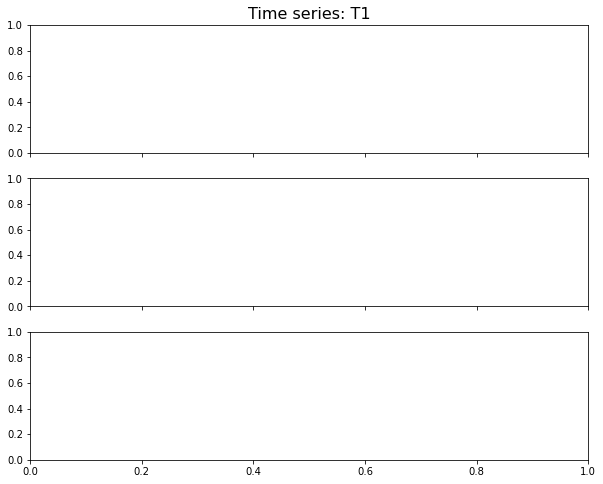

In [54]:
#Characteristic to plot:
datafeature = "median"
imposedtimeseries = ["1","2","5"]
#Load dataset for time series in terms of Dat
hr = h5py.File(os.path.join(hdf5directory, "Paper2","Figurecodes","Temporal_analysis_full_Dat.h5"), mode = 'r')
#Load dataset for base velocity ratio values which will be plotted in the graph
basedata = np.load(os.path.join(sourcedatadir, "SlowAR_0/NS-AH/NS-AH_df.npy"))
basevelocity = np.mean(basedata[2, -1, :, :])
fig, ax = plt.subplots(3, 1, figsize = (10,8), sharey = True, sharex = True)
for t in imposedtimeseries:
    a = ax.flat[imposedtimeseries.index(t)]
    a.set_title("Time series: T"+ t, fontsize = 16)
    for Dat in [0,1,2,3]:
        n = hr.get(t + "/"+r+"/Dat" + str(Dat) + "/"+datafeature+"/").value
        print(np.shape(n))
        a.plot(n[1:], label = labels[Dat], color = PeDapalette[Dat])
        #a.plot(np.convolve(n[1:], np.ones((3,))/3,mode = 'valid'), label = Dat)
    directory = os.path.join(sourcedatadir, "SlowAR_" + t)
    for j in ["37"]:
        a = ax.flat[imposedtimeseries.index(t)]
        data = np.load(os.path.join(directory,"NS-A"+j,"NS-A"+j+"_df.npy"))
        velocity = np.mean(data[2, :, :, :], axis = (-1,-2))/basevelocity
        a.plot(np.abs(velocity[1:]), color= "gray")
a.legend(ncol = 2)
#locs, labels1 = a.xticks()
plt.xticks((0,365,730,1095), (0,5,10,15))
a.set_xlabel ("Time (years)", fontsize = 18)
for a, typsp in zip(ax, imposedtimeseries):
    a.set_title("Time series: "+typsp, fontsize=15)
plt.annotate("Ratio with respect to steady state conditions",
        xy=(0, 1.8),
        xytext=(-50, -10),
        xycoords="axes fraction",
        textcoords="offset points",
        size="large",
        ha="left",
        va="center",
        rotation="vertical",
        fontsize=18)
picname = os.path.join(hdf5directory, "Paper2","Figurecodes","Temporal_analysis_full_data.png")
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
hr.close()

<ipython-input-43-10951571b11e>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-43-10951571b11e>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-43-10951571b11e>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-43-10951571b11e>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value


(1095,)
(1095,)
(1095,)
(1095,)


<ipython-input-43-10951571b11e>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-43-10951571b11e>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-43-10951571b11e>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-43-10951571b11e>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value


(1095,)
(1095,)
(1095,)
(1095,)


<ipython-input-43-10951571b11e>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-43-10951571b11e>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-43-10951571b11e>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-43-10951571b11e>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value


(1095,)
(1095,)
(1095,)
(1095,)


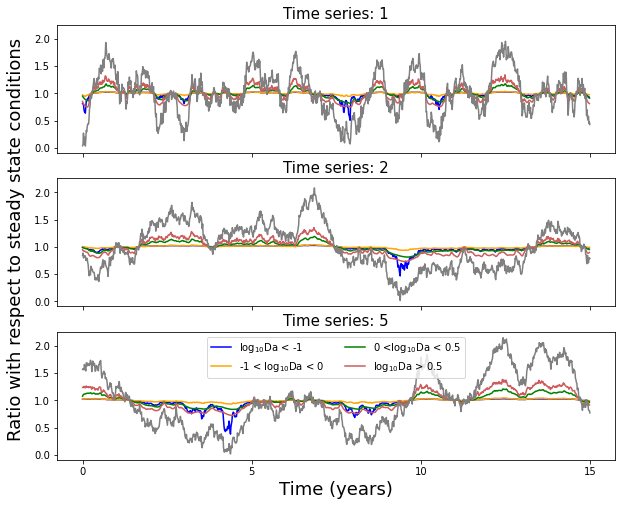

In [43]:
#Characteristic to plot:
datafeature = "median"
imposedtimeseries = ["1","2","5"]
#Load dataset for time series in terms of Dat
hr = h5py.File(os.path.join(hdf5directory, "Paper2","Figurecodes","Temporal_analysis_dissolved_Dat.h5"), mode = 'r')
#Load dataset for base velocity ratio values which will be plotted in the graph
basedata = np.load(os.path.join(sourcedatadir, "SlowAR_0/NS-AH/NS-AH_df.npy"))
basevelocity = np.mean(basedata[2, -1, :, :])
fig, ax = plt.subplots(3, 1, figsize = (10,8), sharey = True, sharex = True)
for t in imposedtimeseries:
    a = ax.flat[imposedtimeseries.index(t)]
    a.set_title("Time series: T"+ t, fontsize = 16)
    for Dat in [0,1,2,3]:
        n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
        print(np.shape(n))
        a.plot(n[1:], label = labels[Dat], color = PeDapalette[Dat])
        #a.plot(np.convolve(n[1:], np.ones((3,))/3,mode = 'valid'), label = Dat)
    directory = os.path.join(sourcedatadir, "SlowAR_" + t)
    for j in ["37"]:
        a = ax.flat[imposedtimeseries.index(t)]
        data = np.load(os.path.join(directory,"NS-A"+j,"NS-A"+j+"_df.npy"))
        velocity = np.mean(data[2, :, :, :], axis = (-1,-2))/basevelocity
        a.plot(np.abs(velocity[1:]), color= "gray")
a.legend(ncol = 2)
#locs, labels1 = a.xticks()
plt.xticks((0,365,730,1095), (0,5,10,15))
a.set_xlabel ("Time (years)", fontsize = 18)
for a, typsp in zip(ax, imposedtimeseries):
    a.set_title("Time series: "+typsp, fontsize=15)
plt.annotate("Ratio with respect to steady state conditions",
        xy=(0, 1.8),
        xytext=(-50, -10),
        xycoords="axes fraction",
        textcoords="offset points",
        size="large",
        ha="left",
        va="center",
        rotation="vertical",
        fontsize=18)
picname = os.path.join(hdf5directory, "Paper2","Figurecodes","Temporal_analysis_full_data.png")
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
hr.close()

## Generating time series for total species and DO

In [45]:
gvarnames = ["TOC", "Nitrogen"]
#Load already generated time series
hr = h5py.File(os.path.join(hdf5directory, "Paper2","Figurecodes","Temporal_analysis_full_data.h5"), mode = 'r')
#Write new time series in a new HDF5 file
hw = h5py.File(os.path.join(hdf5directory,"Paper2","Figurecodes","Temporal_analysis_total_Dat.h5"), mode = 'w')
print(hr.keys())

for t in imposedtimeseries:
    n0=[]
    n1=[]
    n2=[]
    n3=[]
    for Reg in Regimes:
        if Reg == "Equal":
            r = "Medium"
        else:
            r = Reg    
        for g in gvarnames:
            for j in Trial:
                if ((j == '52' and t == "5") or (j == '43' and t == "1")):
                    pass
                else:                   
                    n = hr.get(t + "/" + Reg + "/" + j + "/" + g).value
                    if int(colorcriteria[j+r+g+"0"]) == 0:
                        n0.append(n)
                    elif int(colorcriteria[j+r+g+"0"]) == 1: 
                        n1.append(n)
                    elif int(colorcriteria[j+r+g+"0"]) == 2:
                        n2.append(n)
                    elif int(colorcriteria[j+r+g+"0"]) == 3:
                        n3.append(n)
    for Dat, k in zip([0,1,2,3],[n0, n1, n2, n3]):
        df = pd.DataFrame.from_records(k)
        #Then take average at each time point
        hw.create_dataset(t + "/Dat" + str(Dat) + "/mean/", data=df.mean())
        #Then take average at each time point
        hw.create_dataset(t + "/Dat" + str(Dat) + "/median/", data=df.median())
        #Then take minimum at each time point
        hw.create_dataset(t + "/Dat" + str(Dat) + "/min/", data=df.min())
        #Then take maximum at each time point
        hw.create_dataset(t + "/Dat" + str(Dat) + "/max/", data=df.max())
hr.close()
hw.close()

<KeysViewHDF5 ['1', '2', '5']>


<ipython-input-45-9023c46b42dd>:23: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/" + Reg + "/" + j + "/" + g).value


<ipython-input-46-1daa2fd4f098>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-46-1daa2fd4f098>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-46-1daa2fd4f098>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-46-1daa2fd4f098>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value


(1095,)
(1095,)
(0,)
(0,)


<ipython-input-46-1daa2fd4f098>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-46-1daa2fd4f098>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-46-1daa2fd4f098>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-46-1daa2fd4f098>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value


(1095,)
(1095,)
(0,)
(0,)


<ipython-input-46-1daa2fd4f098>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-46-1daa2fd4f098>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-46-1daa2fd4f098>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
<ipython-input-46-1daa2fd4f098>:14: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value


(1095,)
(1095,)
(0,)
(0,)


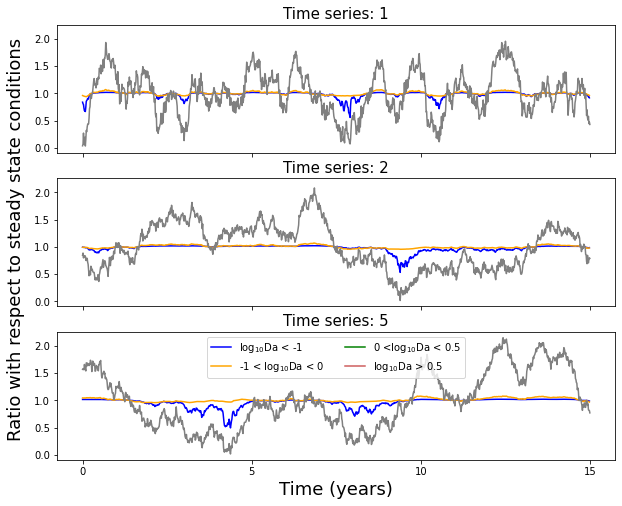

In [46]:
#Characteristic to plot:
datafeature = "median"
imposedtimeseries = ["1","2","5"]
#Load dataset for time series in terms of Dat
hr = h5py.File(os.path.join(hdf5directory, "Paper2","Figurecodes","Temporal_analysis_total_Dat.h5"), mode = 'r')
#Load dataset for base velocity ratio values which will be plotted in the graph
basedata = np.load(os.path.join(sourcedatadir, "SlowAR_0/NS-AH/NS-AH_df.npy"))
basevelocity = np.mean(basedata[2, -1, :, :])
fig, ax = plt.subplots(3, 1, figsize = (10,8), sharey = True, sharex = True)
for t in imposedtimeseries:
    a = ax.flat[imposedtimeseries.index(t)]
    a.set_title("Time series: T"+ t, fontsize = 16)
    for Dat in [0,1,2,3]:
        n = hr.get(t + "/Dat" + str(Dat) + "/"+datafeature+"/").value
        print(np.shape(n))
        a.plot(n[1:], label = labels[Dat], color = PeDapalette[Dat])
        #a.plot(np.convolve(n[1:], np.ones((3,))/3,mode = 'valid'), label = Dat)
    directory = os.path.join(sourcedatadir, "SlowAR_" + t)
    for j in ["37"]:
        a = ax.flat[imposedtimeseries.index(t)]
        data = np.load(os.path.join(directory,"NS-A"+j,"NS-A"+j+"_df.npy"))
        velocity = np.mean(data[2, :, :, :], axis = (-1,-2))/basevelocity
        a.plot(np.abs(velocity[1:]), color= "gray")
a.legend(ncol = 2)
#locs, labels1 = a.xticks()
plt.xticks((0,365,730,1095), (0,5,10,15))
a.set_xlabel ("Time (years)", fontsize = 18)
for a, typsp in zip(ax, imposedtimeseries):
    a.set_title("Time series: "+typsp, fontsize=15)
plt.annotate("Ratio with respect to steady state conditions",
        xy=(0, 1.8),
        xytext=(-50, -10),
        xycoords="axes fraction",
        textcoords="offset points",
        size="large",
        ha="left",
        va="center",
        rotation="vertical",
        fontsize=18)
picname = os.path.join(hdf5directory, "Paper2","Figurecodes","Temporal_analysis_full_data.png")
#plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
hr.close()